In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft, fftfreq, rfft, rfftfreq, irfft
import pylab
import cmath
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
field_ball = pd.read_excel('D:\\Горный\\Теория поля\\Курсовая\\Поле шара.xlsx')
field_ball

,X,Y,U
0,0,0,0.350918
1,1,0,0.407280
2,2,0,0.471818
3,3,0,0.544331
4,4,0,0.623619
...,...,...,...
436,16,20,0.623619
437,17,20,0.544331
438,18,20,0.471818
439,19,20,0.407280


In [49]:
field_st = pd.read_excel('D:\\Горный\\Теория поля\\Курсовая\\Поле стержня.xlsx')
field_st

,X,Y,U1,U
0,0,0,6.640796e-09,4.975124
1,1,0,7.334066e-09,5.494505
2,2,0,8.089697e-09,6.060606
3,3,0,8.898667e-09,6.666667
4,4,0,9.743066e-09,7.299270
...,...,...,...,...
436,16,20,9.743066e-09,7.299270
437,17,20,8.898667e-09,6.666667
438,18,20,8.089697e-09,6.060606
439,19,20,7.334066e-09,5.494505


In [4]:
# Выводим 3Д поверхность поля и карту изолиний
def map_and_3D(df):
    z_data = df.pivot_table(index='X', columns='Y')
    fig = go.Figure(data=[go.Surface(z=z_data.values)])
    fig.show(renderer='browser')
    fig = go.Figure(data = go.Contour(z=z_data.values))
    fig.show(renderer='browser')

map_and_3D(field_ball)

In [5]:
map_and_3D(field_st)

In [55]:
def Profil(df, N):
    PR_10 = df.query('Y == @N')
    x = PR_10.X
    u = PR_10.U
    return x, u

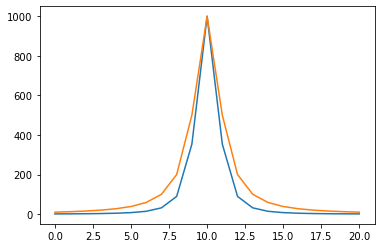

In [56]:
x1, u1 = Profil(field_ball, 10)
x2, u2 = Profil(field_st, 10)
plt.plot(x1, u1)
plt.plot(x2, u2)
plt.show()

In [51]:
def Modul(df, N, name_column='U', graph=True):
    u = df.query('Y == @N')[name_column]
    F = rfft(u)
    Modul = abs(F)
    Phase = np.array([cmath.phase(num) for num in F])
    freq = rfftfreq(len(u))
    if graph:
        plt.plot(freq, Modul)
        plt.show()
    else:
        return freq, Modul

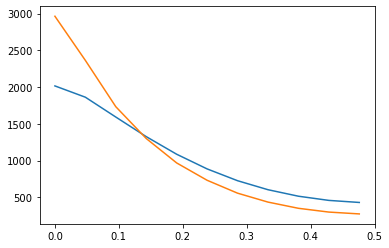

In [54]:
freq1, Modul1 = Modul(field_ball, 10, graph=False)
freq2, Modul2 = Modul(field_st, 10, graph=False)
plt.plot(freq1, Modul1)
plt.plot(freq2, Modul2)
plt.show()

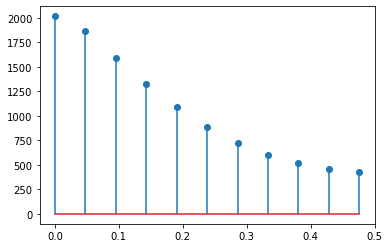

In [12]:
u = field_ball.query('Y==10').U
F = rfft(u)
Modul = abs(F)
Phase = np.array([cmath.phase(num) for num in F])
freq = rfftfreq(len(u))
plt.stem(freq, Modul)
plt.show()

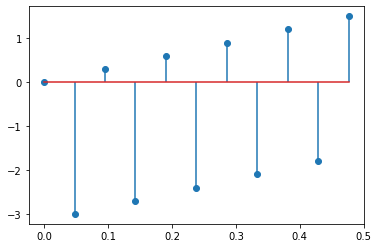

In [13]:
plt.stem(freq, Phase)
plt.show()

In [14]:
Modul_tr = np.array([m * math.exp(-1*abs(f)*3) for m, f in zip(Modul, freq)])
Modul_tr

array([2015.88079398, 1614.56037842, 1196.87664449,  863.9537298 ,
        613.69922052,  434.32728879,  308.41177516,  222.30872159,
        164.50442135,  126.86098171,  103.26995316])

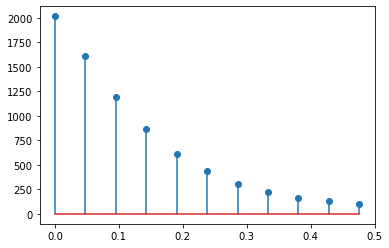

In [15]:
plt.stem(freq, Modul_tr)
plt.show()

In [16]:
F_tr = np.array([cmath.rect(m, phi) for m, phi in zip(Modul_tr, Phase)])
F_tr

array([ 2015.88079398  +0.j        , -1596.52707298-240.63773768j,
        1143.70277335+352.78558409j,  -778.39541386-374.85547471j,
         507.06209176+345.70908054j,  -318.38443203-295.4175811j ,
         192.29159658+241.12603538j,  -111.1543608 -192.52500038j,
          60.10021381+153.13284737j,   -28.22922413-123.68031204j,
           7.71737326+102.98118942j])

In [17]:
U_tr = irfft(F_tr, len(u))
U_tr

array([  8.20228019,   8.93760158,  10.03340401,  12.60891138,
        15.94946983,  23.64215756,  36.04735386,  68.2096104 ,
       143.68301988, 363.64023058, 633.97271543, 363.64023058,
       143.68301988,  68.2096104 ,  36.04735386,  23.64215756,
        15.94946983,  12.60891138,  10.03340401,   8.93760158,
         8.20228019])

In [30]:
def Furie_Profil(Field, profil_name='Y', field_name='U'):
    Furie_Field = {profil_name : [], 'Freq' : [], 'Modul' : [], 'Phase' : []}
    iter_array = Field[profil_name].unique()
    for i in iter_array:
        Profil_Field = Field.query('{}=={}'.format(profil_name, i))
        U = Profil_Field[field_name]
        F = rfft(U)
        Furie_Field['Modul'].extend(abs(F))
        Furie_Field['Phase'].extend([cmath.phase(num) for num in F])
        Furie_Field['Freq'].extend(rfftfreq(len(U)))
        Furie_Field[profil_name].extend([i for _ in range(len(F))])
    Furie_Field = pd.DataFrame(Furie_Field)
    return Furie_Field

In [31]:
F_PR_Y = Furie_Profil(field_ball)
F_PR_Y

,Y,Freq,Modul,Phase
0,0,0.000000,14.309431,0.000000
1,0,0.047619,3.198666,-2.991993
2,0,0.095238,0.093108,-2.842393
3,0,0.142857,0.122701,-2.692794
4,0,0.190476,0.061850,-2.543194
...,...,...,...,...
226,20,0.285714,0.024615,-2.243995
227,20,0.333333,0.016111,-2.094395
228,20,0.380952,0.010197,-1.944795
229,20,0.428571,0.005665,-1.795196


In [32]:
z_data = F_PR_Y.pivot_table(index='Y', columns='Freq')
x = F_PR_Y.Freq
y = z_data.index
fig = go.Figure(data=[go.Surface(z=z_data.values, x=x, y=y)])
fig.show(renderer='browser')
fig = go.Figure(data = go.Contour(z=z_data.values, x=x, y=y))
fig.show(renderer='browser')

In [33]:
def Upper_Field(df, h):
    Furie_Field = df.copy()
    Modul_tr = []
    iter_array = Furie_Field.iloc[:, 0].unique()
    for i in iter_array:
        Profil_Field = Furie_Field.query('{}=={}'.format(Furie_Field.columns[0], i))
        Modul = Profil_Field.Modul.values
        Freq = Profil_Field.Freq.values
        Modul_tr.extend([m * math.exp(-1*abs(f)*h) for m, f in zip(Modul, Freq)])
    Furie_Field['Modul_tr'] = Modul_tr
    del Furie_Field['Modul']
    return Furie_Field

In [34]:
Upper_Field(F_PR_Y, 3)

,Y,Freq,Phase,Modul_tr
0,0,0.000000,0.000000,14.309431
1,0,0.047619,-2.991993,2.772853
2,0,0.095238,-2.842393,0.069969
3,0,0.142857,-2.692794,0.079932
4,0,0.190476,-2.543194,0.034928
...,...,...,...,...
226,20,0.285714,-2.243995,0.010446
227,20,0.333333,-2.094395,0.005927
228,20,0.380952,-1.944795,0.003252
229,20,0.428571,-1.795196,0.001566


In [35]:
def Furie_Inverse(Furie_Field, Pikets, profil_name='Y', piket_name='X', field_name='U_tr'):
    Field = {piket_name : [], profil_name : [], field_name : []}
    iter_array = Furie_Field[profil_name].unique()
    for i in iter_array:
        Profil_Field = Furie_Field.query('{}=={}'.format(profil_name, i))
        Modul_tr = Profil_Field.Modul_tr
        Phase = Profil_Field.Phase
        F_tr = [cmath.rect(m, phi) for m, phi in zip(Modul_tr, Phase)]
        U_tr = irfft(F_tr, len(Pikets))
        Field[field_name].extend(U_tr)
        Field[piket_name].extend(Pikets)
        Field[profil_name].extend([i for _ in range(len(Pikets))])
    Field = pd.DataFrame(Field)
    return Field

In [36]:
field_ball_tr = Furie_Inverse(Upper_Field(F_PR_Y, 12), field_ball.X.unique())
field_ball_tr

,X,Y,U_tr
0,0,0,0.505978
1,1,0,0.524545
2,2,0,0.557148
3,3,0,0.599017
4,4,0,0.646463
...,...,...,...
436,16,20,0.646463
437,17,20,0.599017
438,18,20,0.557148
439,19,20,0.524545


In [37]:
# Выводим 3Д поверхность поля и карту изолиний
z_data = field_ball_tr.pivot_table(index='X', columns='Y')
fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.show(renderer='browser')
fig = go.Figure(data = go.Contour(z=z_data.values))
fig.show(renderer='browser')

In [38]:
# Несколько поверхностей на одном графике
z1 = field_ball
z2 = Furie_Inverse(Upper_Field(F_PR_Y, 3), field_ball.X.unique())
z3 = Furie_Inverse(Upper_Field(F_PR_Y, 7), field_ball.X.unique())
z1_data = z1.pivot_table(index='X', columns='Y')
z2_data = z2.pivot_table(index='X', columns='Y')
z3_data = z3.pivot_table(index='X', columns='Y')

fig = go.Figure(data=[
    go.Surface(z=z1_data.values, opacity=0.25),
    go.Surface(z=z2_data.values, showscale=False, opacity=0.5),
    go.Surface(z=z3_data.values, showscale=False, opacity=1)
])
fig.show(renderer='browser')

In [39]:
# 4 графика на листе
z1 = field_ball
z2 = Furie_Inverse(Upper_Field(F_PR_Y, 3), field_ball.X.unique())
z3 = Furie_Inverse(Upper_Field(F_PR_Y, 7), field_ball.X.unique())
z4 = Furie_Inverse(Upper_Field(F_PR_Y, 15), field_ball.X.unique())
z1_data = z1.pivot_table(index='X', columns='Y')
z2_data = z2.pivot_table(index='X', columns='Y')
z3_data = z3.pivot_table(index='X', columns='Y')
z4_data = z4.pivot_table(index='X', columns='Y')

fig = make_subplots(rows=2, cols=2,
                    specs=[[{'is_3d': True}, {'is_3d': True}], [{'is_3d': True}, {'is_3d': True}]],
                    subplot_titles=['Start_field', 'h = 3', 'h = 7', 'h = 15'],
                    )

fig.add_trace(go.Surface(z=z1_data.values), 1, 1)
fig.add_trace(go.Surface(z=z2_data.values, showscale=False), 1, 2)
fig.add_trace(go.Surface(z=z3_data.values, showscale=False), 2, 1)
fig.add_trace(go.Surface(z=z4_data.values, showscale=False), 2, 2)

fig.update_layout(title_text="Пересчет поля вверх на разную высоту")
fig.show(renderer='browser')

In [40]:
real_field = pd.read_excel('D:\\Горный\\Теория поля\\Курсовая\\Реальное_поле.xlsx')
real_field

,X,Y,U
0,16450,6240,2.919138
1,16451,6240,2.985610
2,16452,6240,3.108869
3,16453,6240,3.379320
4,16454,6240,3.720608
...,...,...,...
109156,16796,6550,4.186636
109157,16797,6550,4.166988
109158,16798,6550,4.146568
109159,16799,6550,4.138702


In [27]:
map_and_3D(real_field)

In [7]:
Real_field_PR_Y = Furie_Profil(real_field)
Real_field_PR_Y

,Y,Freq,Modul,Phase
0,6240,0.000000,730.178966,0.000000
1,6240,0.002849,397.815544,-0.762458
2,6240,0.005698,271.078572,-1.508636
3,6240,0.008547,314.542677,-1.605211
4,6240,0.011396,254.039062,-2.487522
...,...,...,...,...
54731,6550,0.487179,2.030464,3.117222
54732,6550,0.490028,1.971494,-3.133122
54733,6550,0.492877,1.974483,-3.077889
54734,6550,0.495726,1.846475,-3.076696


In [8]:
Real_upper_field = Furie_Inverse(Upper_Field(Real_field_PR_Y, 3), real_field.X.unique())
Real_upper_field

,X,Y,U_tr
0,16450,6240,2.540069
1,16451,6240,2.887017
2,16452,6240,3.062710
3,16453,6240,3.307487
4,16454,6240,3.533125
...,...,...,...
109156,16796,6550,4.039245
109157,16797,6550,3.992107
109158,16798,6550,3.895307
109159,16799,6550,3.775862


In [26]:
map_and_3D(Real_upper_field)

In [27]:
# Несколько поверхностей на одном графике
z1 = real_field
z2 = Real_upper_field
z1_data = z1.pivot_table(index='X', columns='Y')
z2_data = z2.pivot_table(index='X', columns='Y')

fig = go.Figure(data=[
    go.Surface(z=z1_data.values, opacity=0.25),
    go.Surface(z=z2_data.values, showscale=False, opacity=1)
])
fig.show(renderer='browser')

In [41]:
def V_z(field, h=1):
    PR_Y = Furie_Profil(field)
    upper_field = Furie_Inverse(Upper_Field(PR_Y, h), field.X.unique())
    df = field.merge(upper_field, on=['X', 'Y'])
    df['V_z'] = df['U'] - df['U_tr']
    return df

In [42]:
Field_V_z = V_z(real_field, h=5)
Field_V_z

,X,Y,U,U_tr,V_z
0,16450,6240,2.919138,2.437425,0.481713
1,16451,6240,2.985610,2.816591,0.169019
2,16452,6240,3.108869,3.027464,0.081405
3,16453,6240,3.379320,3.254147,0.125173
4,16454,6240,3.720608,3.441372,0.279236
...,...,...,...,...,...
109156,16796,6550,4.186636,3.946384,0.240252
109157,16797,6550,4.166988,3.872823,0.294165
109158,16798,6550,4.146568,3.744256,0.402312
109159,16799,6550,4.138702,3.536420,0.602282


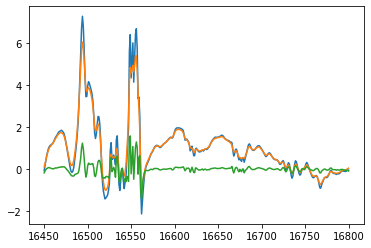

In [43]:
PR_6350 = Field_V_z.query('Y == 6350')
x = PR_6350.X
u = PR_6350.U
U_tr = PR_6350.U_tr
V_z_pr = PR_6350.V_z
plt.plot(x, u)
plt.plot(x, U_tr)
plt.plot(x, V_z_pr)
plt.show()

In [44]:
with pd.ExcelWriter('D:\\Горный\\Теория поля\\Курсовая\\V_Z.xlsx') as writer:
    Field_V_z.to_excel(writer)

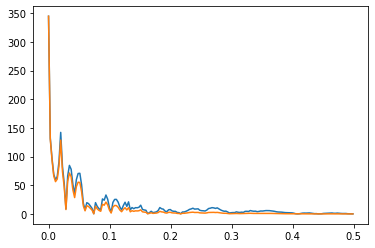

In [47]:
freq1, Modul1 = Modul(real_field, 6350, graph=False)
freq2, Modul2 = Modul(Field_V_z, 6350, name_column='U_tr', graph=False)
plt.plot(freq1, Modul1)
plt.plot(freq2, Modul2)
plt.show()